In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from matplotlib import patches
import seaborn as sn
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from scipy.stats import friedmanchisquare, kruskal, binom_test
from sklearn.cluster import k_means
from sklearn.preprocessing import normalize 
import itertools
#from adjustText import adjust_text
import multiprocessing as mp
import itertools
#import upsetplot as up
#import cProfile #%%prun -s cumulative -q -l 15 -T prun0
np.set_printoptions(suppress=True)

In [16]:
%pwd

'/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/code_file'

## Plot conditional probabilities of projection

Y-axis: Area B

X-axis: Area A

Values: $P(B\ |\ A)$ probability of projecting to B given projection to A 

How to calculcate...

$P(B\ |\ A)$ Of all the neurons that project to A, what proportion also project to B

In [2]:
def gen_prob_matrix(df : pd.DataFrame):
    data = df.to_numpy(copy=True)
    cells,regions = data.shape
    mat = np.zeros((regions,regions)) #area B x area A
    #loop over columns (region )
    for col in range(regions):
        #find all cells (rows in data) that project to 'col'
        ids_col = np.where(data[:,col] != 0)[0]
        sub_col = data[ids_col]
        #of these, how many project to region B
        for row in range(regions):
            ids_row = np.where(sub_col[:,row] != 0)[0]
            prob = ids_row.shape[0] / ids_col.shape[0]
            #print("P({} | {}) = {}".format(df.columns[row],df.columns[col],prob))
            mat[col,row] = prob
    mat = pd.DataFrame(mat, columns=df.columns)
    mat.index = df.columns
    return mat

In [9]:
df = pd.read_csv('/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/results/bar.mat.drop_ecdf.0.999.filter_top.05.quantile.csv',header=0,index_col=0)

In [10]:
df.head()

,AI,DMS,MD,BLA,LH
pfc_1_AAACCCACAAATGGCG,0,0,0,0,0
pfc_1_AAACCCACAGCATTGT,0,0,0,0,0
pfc_1_AAACCCACATAGGCGA,39,0,0,0,0
pfc_1_AAACCCAGTATGCTAC,0,0,0,0,0
pfc_1_AAACCCAGTCTACTGA,0,0,0,0,0


In [11]:
probmat = gen_prob_matrix(df)

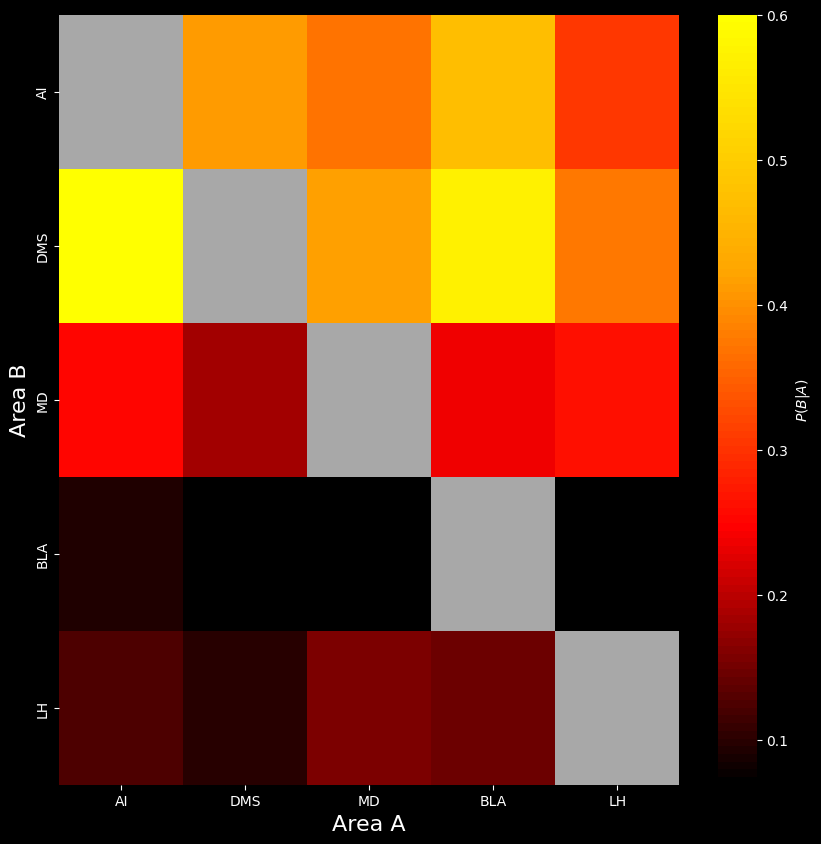

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title(save_name.replace('_',''),fontsize=20)
colors2 = ['black','red','orange','yellow']
#colors2 = ['darkblue','#1f9ed1','#26ffc5','#ffc526','yellow']
cm2 = LinearSegmentedColormap.from_list(
        'white_to_red', colors2, N=100)
ax.set_facecolor('#a8a8a8')
ax = sn.heatmap(probmat.T,mask=probmat.T == 1,ax=ax,cbar_kws=dict(label='$P(B | A)$'),cmap=cm2,vmax=0.6)
ax.set_xlabel("Area A",fontsize=16)
ax.set_ylabel("Area B",fontsize=16)
plt.savefig("fig3_probability_heatmap.pdf")